In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import os
import logging

In [15]:
def load_data(file_path):
    """Loads data from a CSV file."""
    try:
        data = pd.read_csv(file_path, index_col=0)
        logging.info("Data loaded successfully.")
        return data
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        return None

In [16]:
def create_histograms(start_year, end_year, top_k=5):
    data = load_data("EXAMPLE_categories_dataset.csv")
    output_folder = "Histograms/2D"
    output_folder_3d = "Histograms/3D"
    
    # Filter the data for the specified year range
    data = data.loc[:, str(start_year):str(end_year)]
    
    """Creates histograms for each category in the data."""
    if data is None:
        logging.error("Data not loaded. Cannot create histograms.")
        return

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        logging.info(f"Created output folder: {output_folder}")
    if not os.path.exists(output_folder_3d):
        os.makedirs(output_folder_3d)
        logging.info(f"Created output folder: {output_folder_3d}")

    for category in data.index:
        plt.figure()
        data.loc[category].plot(kind='bar')
        plt.title(f"Histogram of {category}")
        plt.xlabel("Year")
        plt.ylabel("Frequency")
        output_path = os.path.join(output_folder, f"{category}.png")
        plt.savefig(output_path)
        logging.info(f"Saved histogram for {category} in {output_path}")
        plt.close()
        
    # Creating 3D histogram for top 10 categories
    top_categories = data.mean(axis=1).nlargest(top_k).index
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Calculate the positions for the y-ticks
    y_tick_positions = np.arange(len(top_categories))

    for i, category in enumerate(top_categories):
        xs = np.arange(data.shape[1])
        ys = data.loc[category]
        ax.bar(xs, ys, zs=y_tick_positions[i], zdir='y', alpha=0.8)

    ax.set_xlabel('Year', labelpad=10)
    ax.set_ylabel('Category', labelpad=20)
    ax.set_zlabel('Frequency', labelpad=10)
    ax.set_yticks(np.arange(5))
    ax.set_yticklabels(top_categories)
    plt.title(f"Top {top_k} Categories")

    output_path_3d = os.path.join(output_folder_3d, f"3d_histogram_top_k{top_k}_categories.png")
    plt.savefig(output_path_3d)
    logging.info(f"Saved 3D histogram for top 10 categories in {output_path_3d}")
    plt.close()

In [29]:
def create_similarity_matrix(category_list = []):
    """
    Creates and saves a similarity matrix (heatmap) from the DataFrame to a specified folder.
    """
    data = load_data("EXAMPLE_category_similarity_dataset.csv")
    folder_name = "Matrix"

    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    # Filter data for specified categories
    data = data.loc[category_list, category_list] if category_list != [] else data
    
    # Check if the data is a square matrix
    if data.shape[0] != data.shape[1]:
        logging.info("Data is not in the correct format. It should be a square matrix.")
        return
    
    # Reverse the order of the columns
    data = data[data.columns[::-1]]

    plt.figure()
    heatmap = sns.heatmap(data, annot=True, cmap='PiYG')
    plt.title("Category Similarity Matrix")
    plt.tight_layout()

    # Save the matrix to the specified folder
    save_path = os.path.join(folder_name, 'similarity_matrix.png')
    heatmap.figure.savefig(save_path)
    logging.info(f"Similarity matrix saved to {save_path}")

    # Optionally, display the matrix
    plt.show()

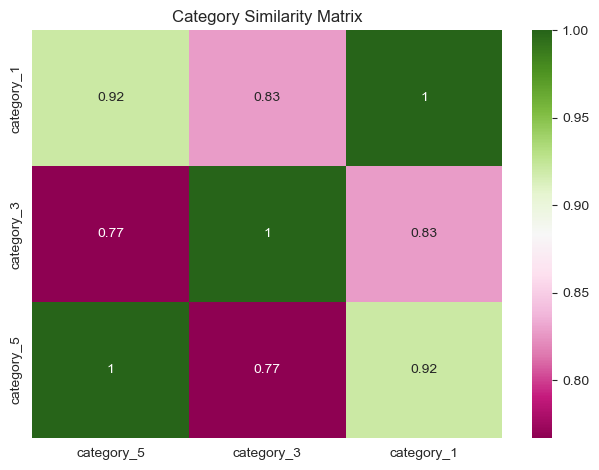

In [31]:
create_histograms(1970,1980, top_k=5)
category_list = ['category_1', 'category_3', 'category_5']
create_similarity_matrix(category_list)